In [105]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

In [106]:
# Train용 70%
rn.seed(a=40)
p = 0.7
review = pd.read_csv('vgame_review.csv',skiprows=lambda i: i>0 and rn.random() > p)
review.head()

,Name,Year,Rating,Num of Reviews,Genres,Reviews,Num of Plays
0,Elden Ring,2022,4.5,3900.0,"['Adventure', 'RPG']","[""The first playthrough of elden ring is one o...",17000.0
1,The Legend of Zelda: Breath of the Wild,2017,4.4,4300.0,"['Adventure', 'RPG']",['This game is the game (that is not CS:GO) th...,30000.0
2,Undertale,2015,4.2,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",['soundtrack is tied for #1 with nier automata...,28000.0
3,Minecraft,2011,4.3,2300.0,"['Adventure', 'Simulator']",['Minecraft is what you make of it. Unfortunat...,33000.0
4,Omori,2020,4.2,1600.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","[""The best game I've played in my life"", ""omor...",7200.0


In [107]:
# Validation용 30%
rn.seed(a=40)
q = 0.3
review_val = pd.read_csv('vgame_review.csv',skiprows=lambda i: i>0 and rn.random() > q)
review_val.head()

,Name,Year,Rating,Num of Reviews,Genres,Reviews,Num of Plays
0,The Legend of Zelda: Breath of the Wild,2017,4.4,4300.0,"['Adventure', 'RPG']",['This game is the game (that is not CS:GO) th...,30000.0
1,Undertale,2015,4.2,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",['soundtrack is tied for #1 with nier automata...,28000.0
2,Omori,2020,4.2,1600.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","[""The best game I've played in my life"", ""omor...",7200.0
3,Persona 5 Royal,2019,4.4,2700.0,"['Adventure', 'RPG', 'Turn Based Strategy']","['Verdadeiro goty 2017, zelda é o caralho. Vai...",12000.0
4,God of War,2018,4.2,2900.0,"['Adventure', 'Brawler', 'RPG']","['freya te vejo como figura materna', 'i ruv !...",21000.0


In [108]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1084 non-null   object 
 1   Year            1084 non-null   int64  
 2   Rating          1084 non-null   float64
 3   Num of Reviews  1084 non-null   float64
 4   Genres          1084 non-null   object 
 5   Reviews         1084 non-null   object 
 6   Num of Plays    1084 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 59.4+ KB


In [109]:
# Obj의 Reviews Str로 변경
review.Reviews = review.Reviews.astype('str')

# Obj의 Rating Int로 변경
#review = review[review['user_review'] != 'tbd']
#review.Rating = review.Rating.astype('float')

In [110]:
# user_review를 긍정 부정으로 나눠서 count(5점 기준)
# 긍정/부정 리뷰 구별
review['Rating_sentiment'] = review['Rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# 리뷰 레이블링한 후, 긍정/부정 리뷰 개수 count
temp = review.groupby('Rating_sentiment').count()['Reviews'].reset_index().sort_values(by='Reviews',ascending=False)

# create colormap dictionary
custom_cmap = mcolors.ListedColormap(['red', 'blue'])
temp.style.background_gradient(cmap=custom_cmap)

,Rating_sentiment,Reviews
1,positive,992
0,negative,92


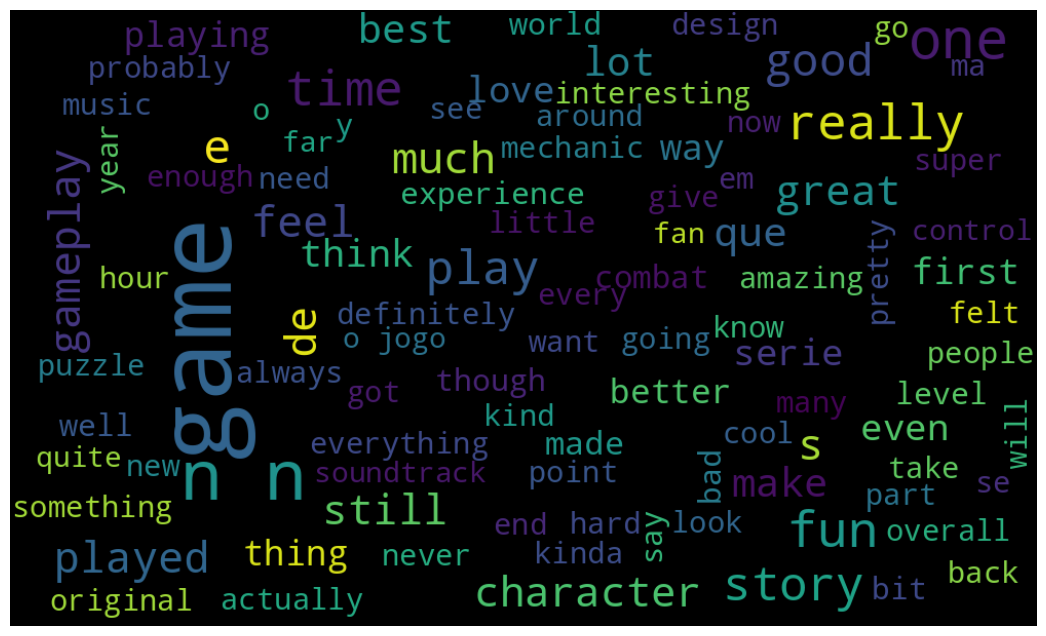

In [111]:
# Review word cloud
txt = ' '.join(rev for rev in review.Reviews)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [112]:
# positive, negative 각각의 word cloud
positive = review[review['Rating_sentiment']=='positive']
negative = review[review['Rating_sentiment']=='negative']

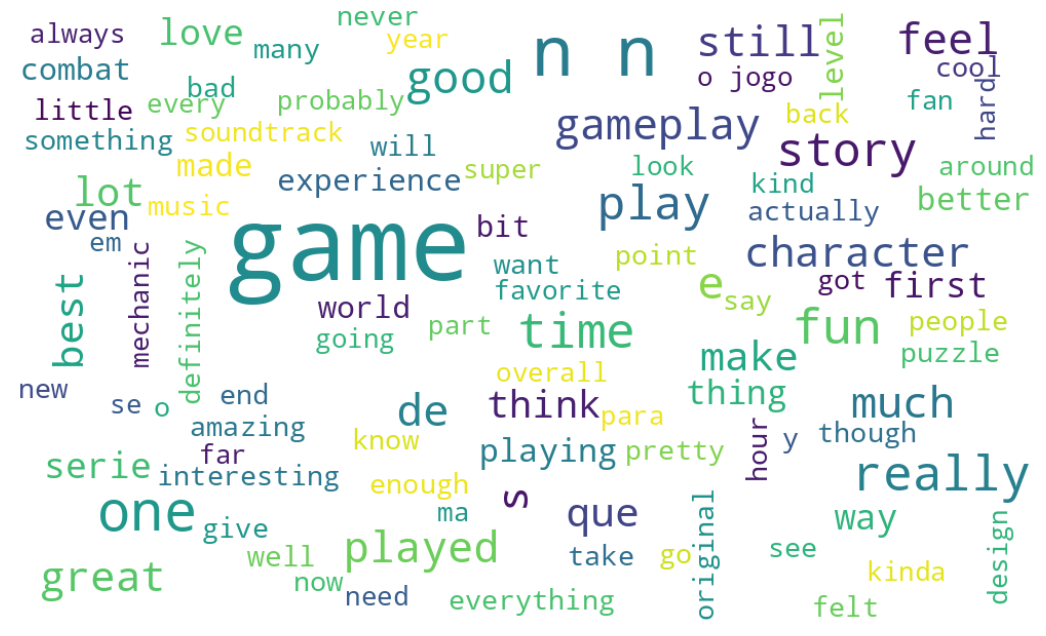

In [113]:
txt = ' '.join(rev for rev in positive.Reviews)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

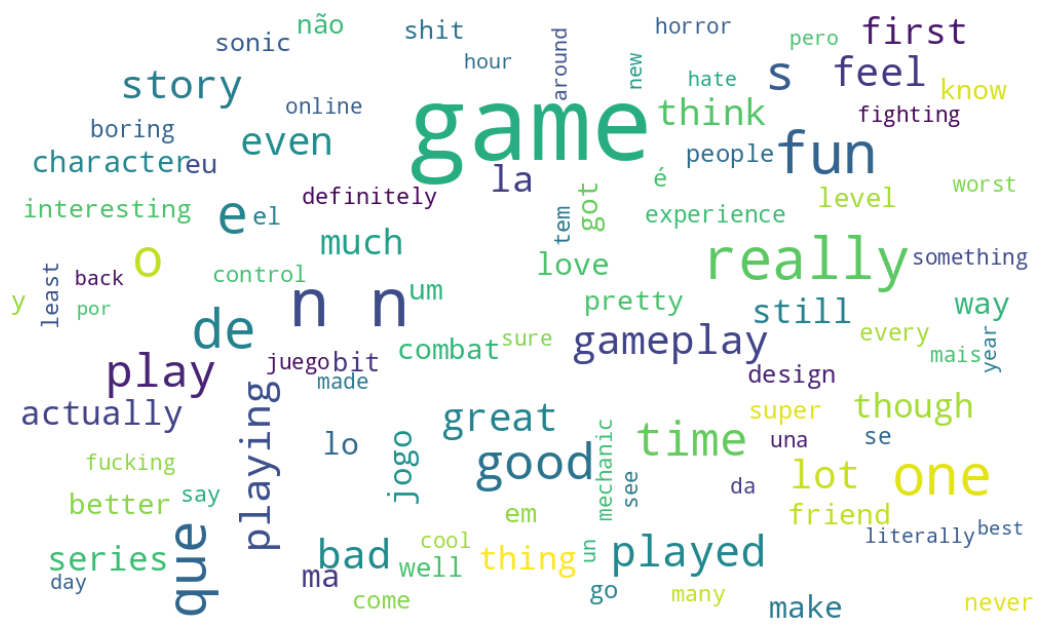

In [114]:
txt = ' '.join(rev for rev in negative.Reviews)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [115]:
review = review.drop(review[review.Reviews == 'Early Access Review'].index)

In [116]:
review_vis = review.copy()

In [117]:
review_vis['Num_word_review'] = review_vis['Reviews'].apply(lambda x:len(str(x).split()))

<Axes: xlabel='Num_word_review', ylabel='Count'>

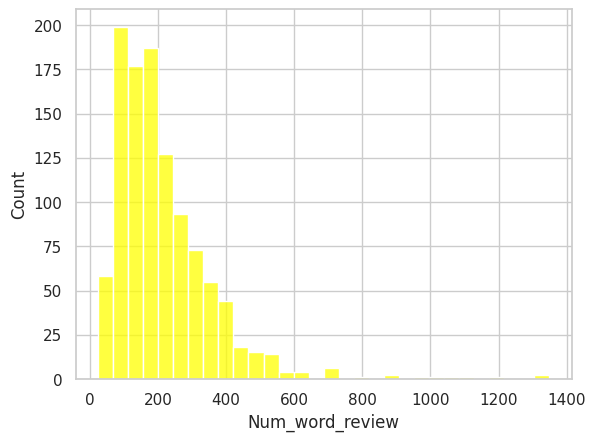

In [118]:
sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='yellow')

In [119]:
review_vis['temp_list'] = review_vis['Reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,9283
1,a,5581
2,and,5254
3,of,4445
4,to,4217
5,is,3387
6,I,3260
7,game,3017
8,this,2630
9,it,2449


Sentimental Processing

In [120]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
# null 갯수 확인
review.isnull().sum()

Name                0
Year                0
Rating              0
Num of Reviews      0
Genres              0
Reviews             0
Num of Plays        0
Rating_sentiment    0
dtype: int64

In [122]:
# duplicate 제거
review = review.drop_duplicates(keep='first')

In [123]:
review.shape

(863, 8)

Exception Handling

In [124]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [125]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [126]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [127]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [128]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [129]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [130]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

Stemming

In [131]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')

def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [132]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [133]:
cleaning(review,'Reviews')

In [134]:
review[['Reviews']].head(20)

,Reviews
0,first playthrough elden ring one best eperi ga...
1,game game cs go play ever play game hour reall...
2,soundtrack tie nier automata super charm stori...
3,minecraft make unfortun there reason anyth mui...
4,best game play life omori game held heartbreak...
5,metroid fan coupl year think worth year wait u...
6,holi shit im carri weight wooooooooooooooooooo...
7,verdadeiro goti zelda caralho vai tomar cu ryu...
8,freya te vejo como figura materna ruv one grea...
9,fav game time everyth amaz soy muy tonto scar ...


In [135]:
review_vis2 = review.copy()

In [136]:
review_vis2['temp_list'] = review_vis2['Reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,4277
1,n,2762
2,play,1321
3,like,1073
4,de,844
5,one,843
6,realli,791
7,que,785
8,time,736
9,fun,730


<Axes: xlabel='count', ylabel='Common_words'>

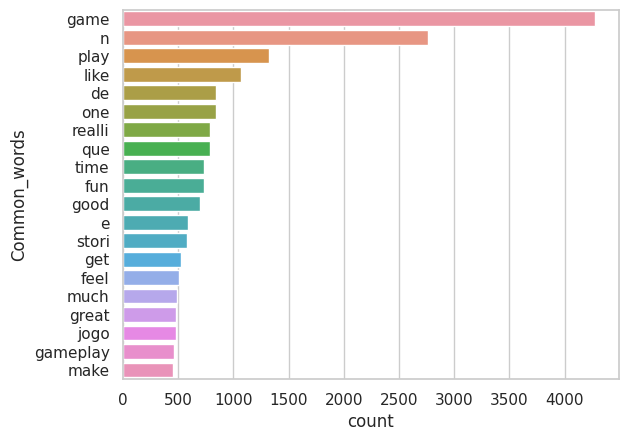

In [137]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

Bag of words

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=4000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [139]:
X = review['Reviews']
y = review['Rating']

In [140]:
from collections import Counter

# threshold = 3
#y = (y >= 0.5).astype(int)
y = np.where(y > 3, 1, -1)
Counter(y)

Counter({1: 755, -1: 108})

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40, test_size = 0.30)

In [142]:
text_classifier = clf.fit(X_train,y_train)

In [143]:
predictions = text_classifier.predict(X_test)

In [144]:
# 예측 결과의 고유한 값 확인
np.unique(predictions)

array([1])

In [145]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score

confusion_matrix(y_test,predictions)

array([[  0,  39],
       [  0, 220]])

In [146]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[1,-1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [147]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.85      1.00      0.92       220
          -1       0.00      0.00      0.00        39

    accuracy                           0.85       259
   macro avg       0.42      0.50      0.46       259
weighted avg       0.72      0.85      0.78       259



TN - True Negative 220
FP - False Positive 0
FN - False Negative 39
TP - True Positive 0
Accuracy Rate: 0.8494208494208494
Misclassification Rate: 0.15057915057915058
F1-Score: 0.45929018789144044
ROC-AUC 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
#sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')

In [149]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL

In [157]:
strategy1 = {-1:5000}
strategy2 = {1:5000}

vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=strategy1)
under = RandomUnderSampler(sampling_strategy=strategy2)
model = RandomForestClassifier()

In [163]:
strategy1 = {-1:700}
strategy2 = {1:700}

vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=strategy1)
under = RandomUnderSampler(sampling_strategy=strategy2)
model = RandomForestClassifier()

X = review['Reviews'].values
y = review['Rating'].values

y = np.where(y > 3, 1, -1)
Counter(y)

trf = vect.fit(X)
X = trf.transform(X)

steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

X_new, y_new = pipeline.fit_resample(X, y)

In [164]:
X = review['Reviews'].values
y = review['Rating'].values

In [165]:
y = np.where(y > 3, 1, -1)
Counter(y)

Counter({1: 755, -1: 108})

In [166]:
trf = vect.fit(X)
X = trf.transform(X)

In [167]:
steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

In [168]:
X_new, y_new = pipeline.fit_resample(X, y)

In [170]:
counter_new = Counter(y_new)
print("Review Sentiment Class Proportion after oversampling and undersampling: \n",counter_new)

Review Sentiment Class Proportion after oversampling and undersampling: 
 Counter({-1: 700, 1: 700})


In [171]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new,random_state = 40, test_size = 0.30)

In [174]:
pipeline2 = Pipeline([
    ('tfidf', tfidf),
    ('model', model),
    ])

In [175]:
text_classifier2 = pipeline2.fit(X_train2,y_train2)

In [176]:
predictions2 = text_classifier2.predict(X_test)

In [177]:
Confusion_Matrix(y_test,predictions2)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.97      0.96      0.97       220
          -1       0.80      0.82      0.81        39

    accuracy                           0.94       259
   macro avg       0.88      0.89      0.89       259
weighted avg       0.94      0.94      0.94       259



TN - True Negative 212
FP - False Positive 8
FN - False Negative 7
TP - True Positive 32
Accuracy Rate: 0.9420849420849421
Misclassification Rate: 0.05791505791505792
F1-Score: 0.8879790086791037
ROC-AUC 0.892074592074592
